In [1]:
import csv
import random
import math
import matplotlib.pyplot as plt

In [2]:
# Membaca dataset
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        for row in reader:
            data.append(row)
    return headers, data

In [3]:
# Menampilkan nama kolom
headers, data = read_csv('hp.csv')
print(headers)

['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [4]:
# Mengonversi data ke bentuk numerik
data = [[float(value) for value in row] for row in data]

In [5]:
# Menghitung statistik deskriptif
def describe(data):
    descriptions = {}
    for i, header in enumerate(headers):
        column = [row[i] for row in data]
        descriptions[header] = {
            'mean': sum(column) / len(column),
            'std': math.sqrt(sum((x - sum(column) / len(column)) ** 2 for x in column) / len(column)),
            'min': min(column),
            'max': max(column)
        }
    return descriptions

In [6]:
# Menampilkan statistik deskriptif
stats = describe(data)
for col, desc in stats.items():
    print(f"{col}: {desc}")

id: {'mean': 500.5, 'std': 288.6749902572095, 'min': 1.0, 'max': 1000.0}
battery_power: {'mean': 1248.51, 'std': 432.24194370745647, 'min': 500.0, 'max': 1999.0}
blue: {'mean': 0.516, 'std': 0.4997439344304241, 'min': 0.0, 'max': 1.0}
clock_speed: {'mean': 1.5409000000000002, 'std': 0.8288529362920783, 'min': 0.5, 'max': 3.0}
dual_sim: {'mean': 0.517, 'std': 0.49971091643068993, 'min': 0.0, 'max': 1.0}
fc: {'mean': 4.593, 'std': 4.461093027498978, 'min': 0.0, 'max': 19.0}
four_g: {'mean': 0.487, 'std': 0.4998309714293423, 'min': 0.0, 'max': 1.0}
int_memory: {'mean': 33.652, 'std': 18.11962736923693, 'min': 2.0, 'max': 64.0}
m_dep: {'mean': 0.5175, 'std': 0.2807200562838359, 'min': 0.1, 'max': 1.0}
mobile_wt: {'mean': 139.511, 'std': 34.83411946640822, 'min': 80.0, 'max': 200.0}
n_cores: {'mean': 4.328, 'std': 2.2870102754469643, 'min': 1.0, 'max': 8.0}
pc: {'mean': 10.054, 'std': 6.09205088619588, 'min': 0.0, 'max': 20.0}
px_height: {'mean': 627.121, 'std': 432.71318024645376, 'min': 0

In [7]:
# Menghitung matriks korelasi
def correlation_matrix(data):
    def covariance(x, y):
        mean_x = sum(x) / len(x)
        mean_y = sum(y) / len(y)
        return sum((a - mean_x) * (b - mean_y) for a, b in zip(x, y)) / len(x)

    def correlation(x, y):
        return covariance(x, y) / (math.sqrt(covariance(x, x)) * math.sqrt(covariance(y, y)))

    matrix = []
    for i in range(len(headers)):
        row = []
        for j in range(len(headers)):
            col_i = [row[i] for row in data]
            col_j = [row[j] for row in data]
            row.append(correlation(col_i, col_j))
        matrix.append(row)
    return matrix

In [8]:
# Menampilkan matriks korelasi
corr_matrix = correlation_matrix(data)
for row in corr_matrix:
    print(row)

[0.9999999999999998, -0.021511428860135264, 0.00046442769640865677, 0.035917088842594126, -0.0027208942591923665, 0.01693383959450736, 0.03092064711254562, -0.014023406968869225, -0.002794407401293737, -0.007541116497167312, -0.015934500865027894, 0.001968585951103249, -0.02505617226493705, -0.012137756030833901, -0.043442152158951884, -0.011971901834633206, 0.002918126732237715, 0.030807201885153714, 0.04957098917009002, 0.03976790642573961, -0.03664341233361477]
[-0.021511428860135264, 1.0000000000000002, -0.04660963151267254, -0.039075429736900306, -0.06117089626917342, -0.007846109758478046, -0.04252005943411317, 0.0037509249063805285, -0.00906489386121748, -0.047064657785360425, 0.02573155819600139, 0.012846706367962524, 0.04864688107532978, 0.053365397728232844, -0.032365639184061955, -0.05566522088286978, -0.023904782666092052, 0.015546012441842429, 0.031514165493947414, -0.010137840771338377, -0.0004144844361110116]
[0.00046442769640865677, -0.04660963151267254, 0.9999999999999

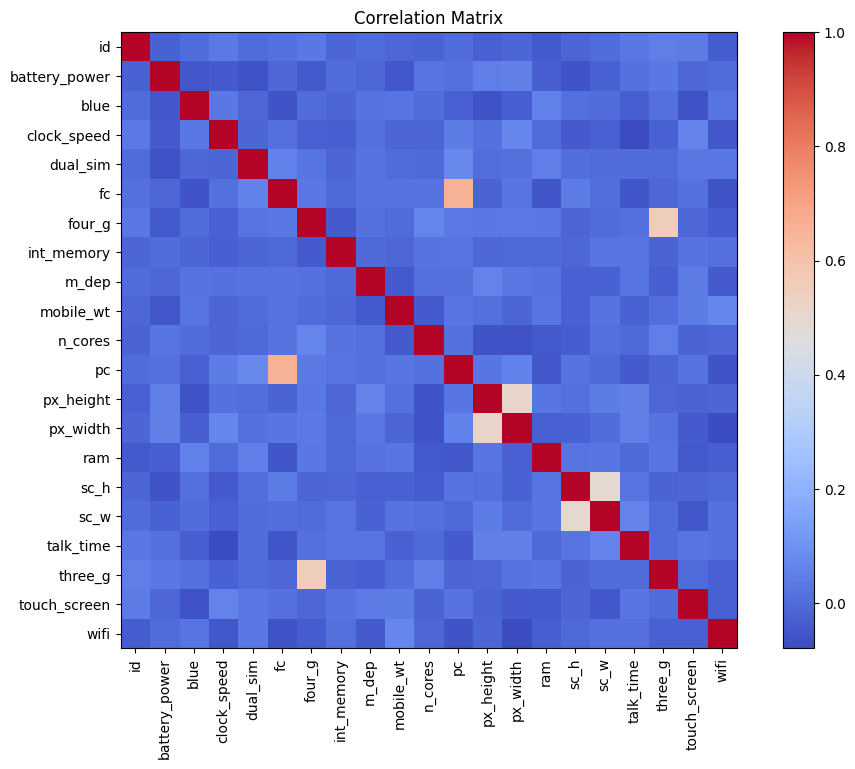

In [9]:
# Menampilkan heatmap matriks korelasi
plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(headers)), headers, rotation=90)
plt.yticks(range(len(headers)), headers)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Menambahkan kolom target berdasarkan ram
ram_index = headers.index('ram')
max_ram = max(row[ram_index] for row in data)
for row in data:
    row.append(int(row[ram_index] // (max_ram / 4)))


In [12]:
# Memisahkan fitur dan label
id_index = headers.index('id')
X = [row[:id_index] + row[id_index+1:-1] for row in data]
y = [row[-1] for row in data]

In [13]:
# Mengatasi missing values (mengganti dengan mean)
for i in range(len(X[0])):
    column = [row[i] for row in X if not math.isnan(row[i])]
    mean_value = sum(column) / len(column)
    for row in X:
        if math.isnan(row[i]):
            row[i] = mean_value

In [14]:
# Membagi dataset menjadi data latih dan data uji
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        random.seed(random_state)
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data = data[:split_index]
    test_data = data[split_index:]
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)
    return list(X_train), list(X_test), list(y_train), list(y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Menghitung nilai rata-rata tiap fitur
mean_values = [sum([row[i] for row in X]) / len(X) for i in range(len(X[0]))]

# Menampilkan nilai rata-rata tiap fitur
for i, mean in enumerate(mean_values):
    print(f"Mean of feature {i}: {mean}")

Mean of feature 0: 1248.51
Mean of feature 1: 0.516
Mean of feature 2: 1.5409000000000002
Mean of feature 3: 0.517
Mean of feature 4: 4.593
Mean of feature 5: 0.487
Mean of feature 6: 33.652
Mean of feature 7: 0.5175
Mean of feature 8: 139.511
Mean of feature 9: 4.328
Mean of feature 10: 10.054
Mean of feature 11: 627.121
Mean of feature 12: 1239.774
Mean of feature 13: 2138.998
Mean of feature 14: 11.995
Mean of feature 15: 5.316
Mean of feature 16: 11.085
Mean of feature 17: 0.756
Mean of feature 18: 0.5
Mean of feature 19: 0.507


In [16]:
# Fungsi simple distance-based classifier
def simple_distance_classifier(X_train, y_train, X_test):
    def euclidean_distance(point1, point2):
        return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

    predictions = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        nearest_index = distances.index(min(distances))
        predictions.append(y_train[nearest_index])
    return predictions

In [17]:
# Mengonversi X_test ke dalam bentuk array untuk komputasi jarak
predictions = simple_distance_classifier(X_train, y_train, X_test)

In [18]:
# Definisikan label kelas harga
class_labels = {
    0: 'Murah',
    1: 'Sedang',
    2: 'Mahal',
    3: 'Sangat Mahal'
}

In [19]:
# Pastikan semua label ada dalam class_labels
for label in set(y_train + predictions):
    if label not in class_labels:
        class_labels[label] = f'Kategori {label}'

In [20]:
# Menampilkan hasil prediksi dengan label kelas harga
for i, test_point in enumerate(X_test):
    print(f"Data: {test_point}, Prediksi Kelas: {class_labels[predictions[i]]}")

Data: [1662.0, 0.0, 0.5, 0.0, 0.0, 0.0, 48.0, 0.8, 155.0, 6.0, 2.0, 875.0, 1362.0, 2787.0, 12.0, 7.0, 19.0, 1.0, 0.0, 1.0], Prediksi Kelas: Mahal
Data: [1933.0, 0.0, 0.5, 1.0, 0.0, 0.0, 63.0, 0.4, 181.0, 8.0, 6.0, 242.0, 668.0, 3142.0, 14.0, 3.0, 16.0, 1.0, 1.0, 1.0], Prediksi Kelas: Sangat Mahal
Data: [1324.0, 1.0, 0.9, 1.0, 7.0, 1.0, 28.0, 0.7, 95.0, 6.0, 8.0, 1243.0, 1928.0, 3269.0, 12.0, 3.0, 19.0, 1.0, 1.0, 1.0], Prediksi Kelas: Sangat Mahal
Data: [1546.0, 0.0, 0.5, 1.0, 18.0, 1.0, 25.0, 0.5, 96.0, 8.0, 20.0, 295.0, 1752.0, 3893.0, 10.0, 0.0, 7.0, 1.0, 1.0, 0.0], Prediksi Kelas: Sangat Mahal
Data: [1657.0, 0.0, 2.6, 1.0, 3.0, 1.0, 22.0, 0.5, 87.0, 4.0, 20.0, 1019.0, 1535.0, 1852.0, 15.0, 5.0, 12.0, 1.0, 1.0, 0.0], Prediksi Kelas: Sedang
Data: [945.0, 0.0, 2.4, 0.0, 3.0, 0.0, 47.0, 0.4, 141.0, 2.0, 11.0, 120.0, 1341.0, 2904.0, 19.0, 14.0, 5.0, 0.0, 0.0, 0.0], Prediksi Kelas: Sangat Mahal
Data: [1235.0, 0.0, 1.5, 0.0, 3.0, 0.0, 33.0, 0.1, 164.0, 8.0, 16.0, 633.0, 1891.0, 1623.0, 10.

In [21]:
# Menghitung akurasi
accuracy = sum(1 for actual, predicted in zip(y_test, predictions) if actual == predicted) / len(y_test)
print(f'Akurasi: {accuracy}')

Akurasi: 0.905


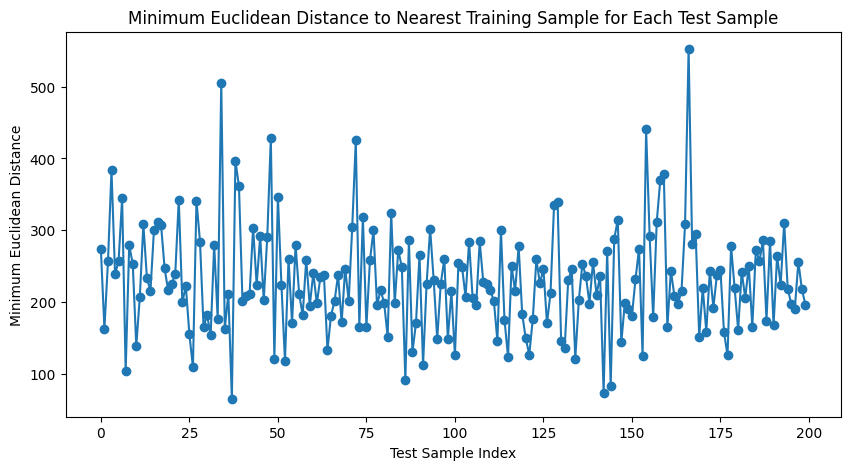

In [22]:
# Menampilkan minimum Euclidean Distance untuk setiap test sample
min_distances = []
for test_point in X_test:
    distances = [math.sqrt(sum((a - b) ** 2 for a, b in zip(test_point, train_point))) for train_point in X_train]
    min_distances.append(min(distances))

plt.figure(figsize=(10, 5))
plt.plot(min_distances, marker='o')
plt.xlabel('Test Sample Index')
plt.ylabel('Minimum Euclidean Distance')
plt.title('Minimum Euclidean Distance to Nearest Training Sample for Each Test Sample')
plt.show()

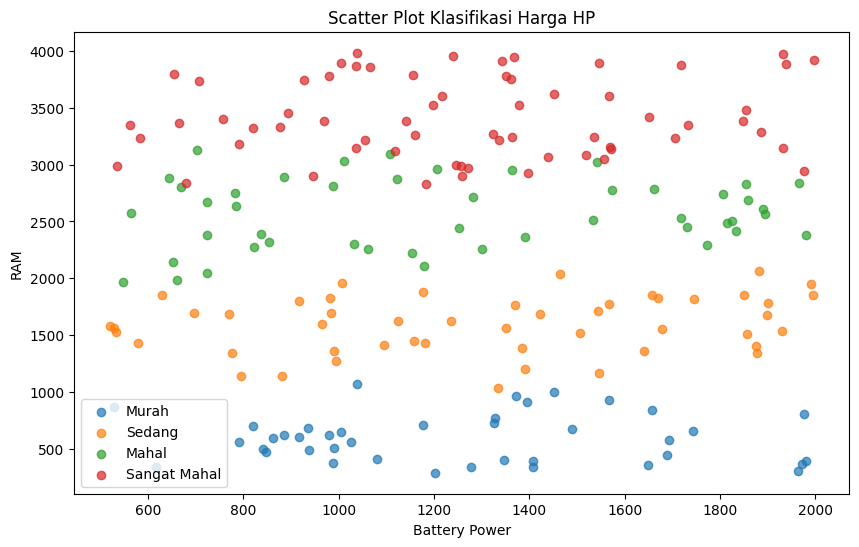

In [23]:
# Scatter plot klasifikasi harga
plt.figure(figsize=(10, 6))

# Mendapatkan indeks kolom setelah menghapus kolom 'id'
battery_power_index = headers.index('battery_power') - 1  # -1 karena kolom 'id' dihapus
ram_index = headers.index('ram') - 1  # -1 karena kolom 'id' dihapus

# Scatter plot untuk setiap kategori harga
for category in set(predictions):
    idx = [i for i, pred in enumerate(predictions) if pred == category]
    plt.scatter([X_test[i][battery_power_index] for i in idx],
                [X_test[i][ram_index] for i in idx],
                label=class_labels[category], alpha=0.7)

plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot Klasifikasi Harga HP')
plt.legend()
plt.show()

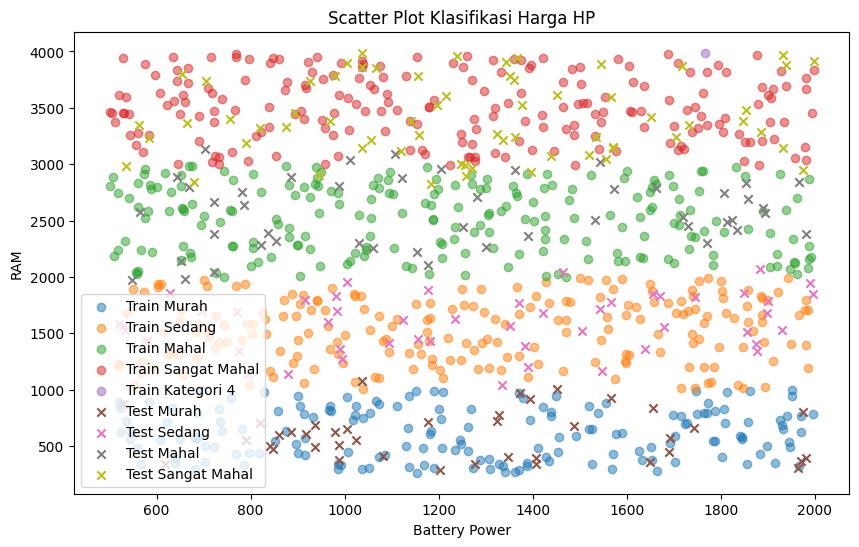

In [24]:
# Scatter plot untuk data latih dan uji
plt.figure(figsize=(10, 6))

# Scatter plot untuk data latih
for category in set(y_train):
    idx = [i for i, label in enumerate(y_train) if label == category]
    plt.scatter([X_train[i][battery_power_index] for i in idx],
                [X_train[i][ram_index] for i in idx],
                label=f'Train {class_labels[category]}', alpha=0.5)

# Scatter plot untuk data uji
for category in set(predictions):
    idx = [i for i, pred in enumerate(predictions) if pred == category]
    plt.scatter([X_test[i][battery_power_index] for i in idx],
                [X_test[i][ram_index] for i in idx],
                label=f'Test {class_labels[category]}', marker='x')

plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Scatter Plot Klasifikasi Harga HP')
plt.legend()
plt.show()

In [25]:
#  Membuat DataFrame untuk hasil prediksi
results_df = [X_test[i] + [y_test[i], predictions[i], class_labels[predictions[i]]] for i in range(len(X_test))]
headers += ['Actual_Price_Label', 'Predicted_Price_Category', 'Predicted_Price_Label']
results_df = [[f'{value:.2f}' if isinstance(value, float) else value for value in row] for row in results_df]

In [26]:
# Menampilkan header dari tabel hasil
headers = headers[1:]
print(','.join(headers))

battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Actual_Price_Label,Predicted_Price_Category,Predicted_Price_Label


In [27]:
# Menampilkan 5 baris pertama dari tabel hasil
for row in results_df[:5]:
    print(row)

['1662.00', '0.00', '0.50', '0.00', '0.00', '0.00', '48.00', '0.80', '155.00', '6.00', '2.00', '875.00', '1362.00', '2787.00', '12.00', '7.00', '19.00', '1.00', '0.00', '1.00', 2, 2, 'Mahal']
['1933.00', '0.00', '0.50', '1.00', '0.00', '0.00', '63.00', '0.40', '181.00', '8.00', '6.00', '242.00', '668.00', '3142.00', '14.00', '3.00', '16.00', '1.00', '1.00', '1.00', 3, 3, 'Sangat Mahal']
['1324.00', '1.00', '0.90', '1.00', '7.00', '1.00', '28.00', '0.70', '95.00', '6.00', '8.00', '1243.00', '1928.00', '3269.00', '12.00', '3.00', '19.00', '1.00', '1.00', '1.00', 3, 3, 'Sangat Mahal']
['1546.00', '0.00', '0.50', '1.00', '18.00', '1.00', '25.00', '0.50', '96.00', '8.00', '20.00', '295.00', '1752.00', '3893.00', '10.00', '0.00', '7.00', '1.00', '1.00', '0.00', 3, 3, 'Sangat Mahal']
['1657.00', '0.00', '2.60', '1.00', '3.00', '1.00', '22.00', '0.50', '87.00', '4.00', '20.00', '1019.00', '1535.00', '1852.00', '15.00', '5.00', '12.00', '1.00', '1.00', '0.00', 1, 1, 'Sedang']
